# Training Metrics Visualization

This notebook loads the training metrics from the CSV file generated during the experiment and plots them using Seaborn for publication-quality figures.

In [46]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1, font='arial')

In [47]:
# Define the path to the metrics CSV file
csv_file_path = 'outputs/R2plus1D_Torchvision_Run3_metrics.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    print(f"Error: CSV file not found at {csv_file_path}")
else:
    print(f"Loading data from: {csv_file_path}")
    # Load the CSV file
    df = pd.read_csv(csv_file_path)

    # Data Cleaning and Preparation
    df.replace('', np.nan, inplace=True)
    numeric_cols = ['loss', 'accuracy', 'f1', 'precision', 'recall', 'map', 'lr']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df['epoch_numeric'] = pd.to_numeric(df['epoch'], errors='coerce')
    df_train = df[df['split'] == 'train'].sort_values('epoch_numeric').copy()
    df_val = df[df['split'] == 'val'].sort_values('epoch_numeric').copy()
    df_test = df[df['split'] == 'test'].copy()
    print("Data loaded and prepared.")
    print(f"Training epochs: {df_train['epoch_numeric'].min()} to {df_train['epoch_numeric'].max()}")
    print(f"Validation epochs: {df_val['epoch_numeric'].min()} to {df_val['epoch_numeric'].max()}")
    display(df.head())

Loading data from: outputs/R2plus1D_Torchvision_Run3_metrics.csv
Data loaded and prepared.
Training epochs: 0 to 19
Validation epochs: 0 to 19


,epoch,split,loss,accuracy,f1,precision,recall,map,lr,epoch_numeric
0,0,train,0.300445,0.853616,0.132777,0.149872,0.131395,NaN,0.001,0
1,0,val,0.240761,0.882693,0.349106,0.393747,0.334918,0.552774,NaN,0
2,1,train,0.223868,0.891132,0.413009,0.457288,0.399735,NaN,0.001,1
3,1,val,0.199570,0.905929,0.508745,0.564850,0.488910,0.675473,NaN,1
4,2,train,0.195803,0.907345,0.543976,0.596729,0.528042,NaN,0.001,2


## Seaborn/Matplotlib Publication-Quality Plots

All plots below use Seaborn and Matplotlib for a consistent academic style. The vertical dashed line at epoch 5 indicates when the model was unfrozen.

**Figure 1:** Training and validation loss over epochs.

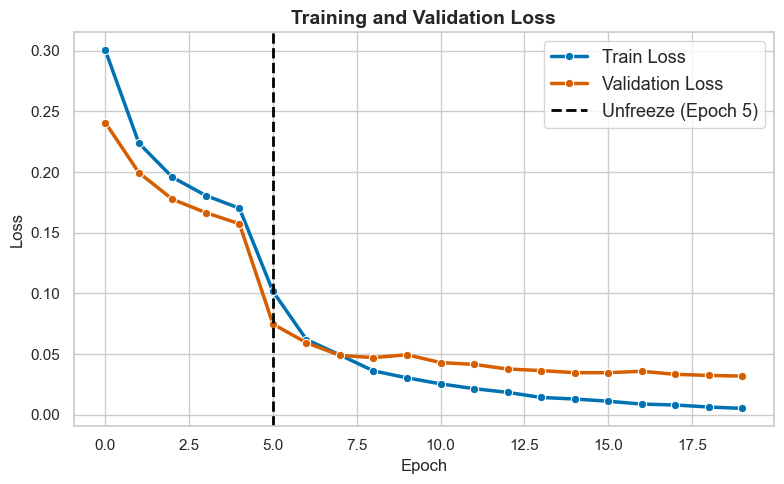

In [49]:
plt.figure(figsize=(8,5))
sns.lineplot(x='epoch_numeric', y='loss', data=df_train, label='Train Loss', linewidth=2.5, marker='o', color='#0072B2')
sns.lineplot(x='epoch_numeric', y='loss', data=df_val, label='Validation Loss', linewidth=2.5, marker='o', color='#D55E00')
plt.axvline(5, color='black', linestyle='--', linewidth=2, label='Unfreeze (Epoch 5)')
plt.title('Training and Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

**Figure 2:** Training and validation accuracy over epochs.

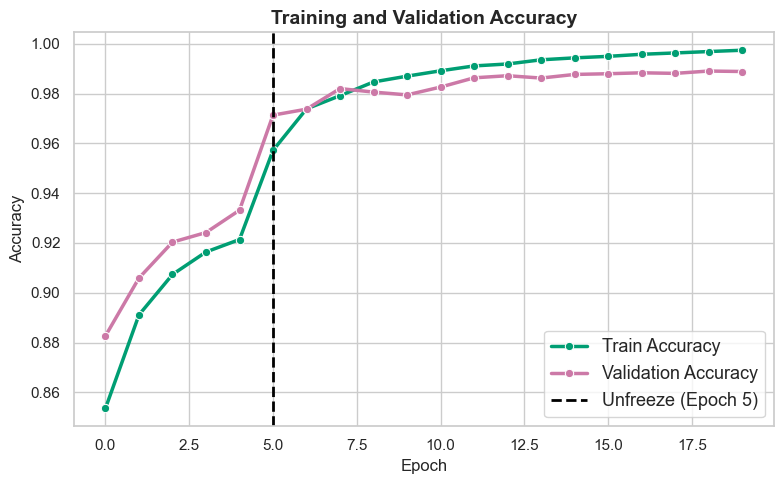

In [50]:
plt.figure(figsize=(8,5))
sns.lineplot(x='epoch_numeric', y='accuracy', data=df_train, label='Train Accuracy', linewidth=2.5, marker='o', color='#009E73')
sns.lineplot(x='epoch_numeric', y='accuracy', data=df_val, label='Validation Accuracy', linewidth=2.5, marker='o', color='#CC79A7')
plt.axvline(5, color='black', linestyle='--', linewidth=2, label='Unfreeze (Epoch 5)')
plt.title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

**Figure 3:** Training and validation F1 score over epochs.

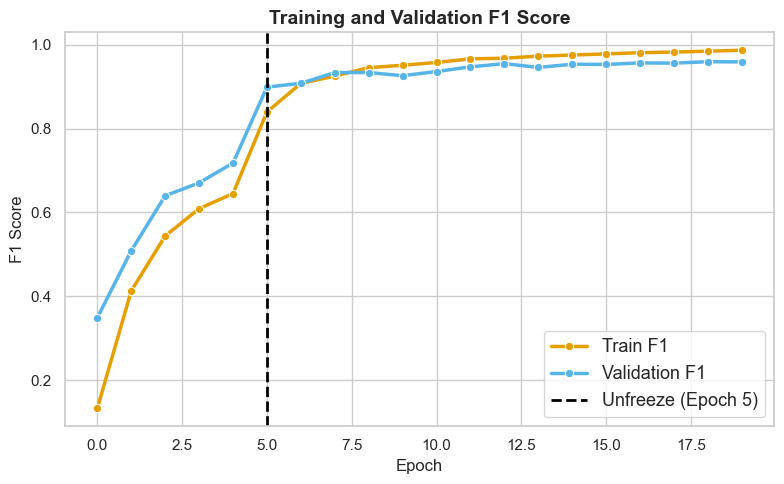

In [51]:
plt.figure(figsize=(8,5))
sns.lineplot(x='epoch_numeric', y='f1', data=df_train, label='Train F1', linewidth=2.5, marker='o', color='#E69F00')
sns.lineplot(x='epoch_numeric', y='f1', data=df_val, label='Validation F1', linewidth=2.5, marker='o', color='#56B4E9')
plt.axvline(5, color='black', linestyle='--', linewidth=2, label='Unfreeze (Epoch 5)')
plt.title('Training and Validation F1 Score', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

**Figure 4:** Training and validation precision and recall over epochs.

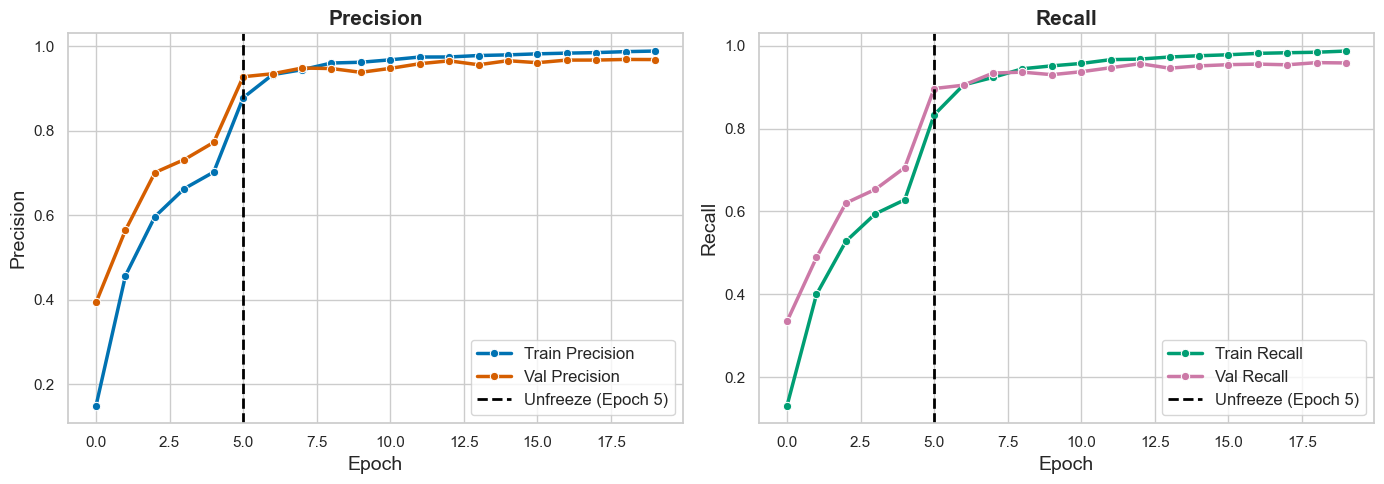

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(14,5), sharex=True)
sns.lineplot(x='epoch_numeric', y='precision', data=df_train, label='Train Precision', linewidth=2.5, marker='o', color='#0072B2', ax=axs[0])
sns.lineplot(x='epoch_numeric', y='precision', data=df_val, label='Val Precision', linewidth=2.5, marker='o', color='#D55E00', ax=axs[0])
axs[0].axvline(5, color='black', linestyle='--', linewidth=2, label='Unfreeze (Epoch 5)')
axs[0].set_title('Precision', fontsize=15, fontweight='bold')
axs[0].set_xlabel('Epoch', fontsize=14)
axs[0].set_ylabel('Precision', fontsize=14)
axs[0].legend(fontsize=12)

sns.lineplot(x='epoch_numeric', y='recall', data=df_train, label='Train Recall', linewidth=2.5, marker='o', color='#009E73', ax=axs[1])
sns.lineplot(x='epoch_numeric', y='recall', data=df_val, label='Val Recall', linewidth=2.5, marker='o', color='#CC79A7', ax=axs[1])
axs[1].axvline(5, color='black', linestyle='--', linewidth=2, label='Unfreeze (Epoch 5)')
axs[1].set_title('Recall', fontsize=15, fontweight='bold')
axs[1].set_xlabel('Epoch', fontsize=14)
axs[1].set_ylabel('Recall', fontsize=14)
axs[1].legend(fontsize=12)

plt.tight_layout()
plt.show()

**Figure 5:** Validation mAP over epochs.

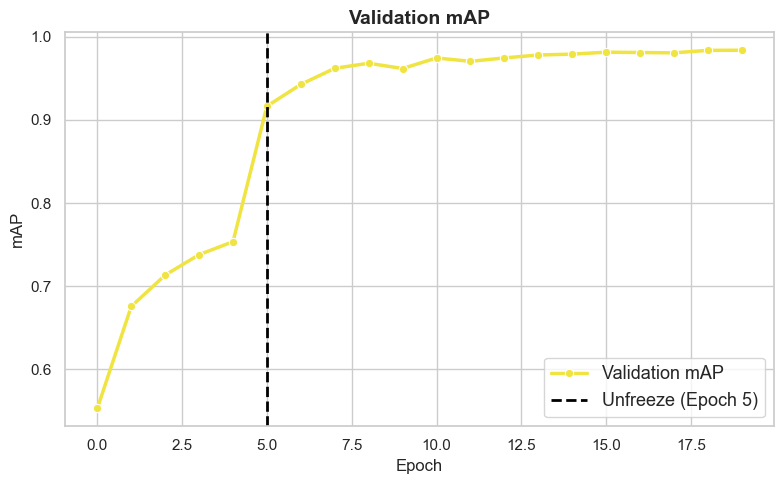

In [52]:
plt.figure(figsize=(8,5))
sns.lineplot(x='epoch_numeric', y='map', data=df_val, label='Validation mAP', linewidth=2.5, marker='o', color='#F0E442')
plt.axvline(5, color='black', linestyle='--', linewidth=2, label='Unfreeze (Epoch 5)')
plt.title('Validation mAP', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('mAP', fontsize=12)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

**Figure 6:** Learning rate schedule over epochs.

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x='epoch_numeric', y='lr', data=df_train, label='Learning Rate (Max)', linewidth=2.5, marker='o', color='#000000')
plt.axvline(5, color='red', linestyle='--', linewidth=2, label='Unfreeze (Epoch 5)')
plt.title('Learning Rate Schedule', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Learning Rate', fontsize=15)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

## Final Test Results

In [9]:
if not df_test.empty:
    print("Final Test Set Metrics:")
    display(df_test)
else:
    print("No test set results found in the CSV.")

Final Test Set Metrics:


,epoch,split,loss,accuracy,f1,precision,recall,map,lr,epoch_numeric
40,19,test,0.269031,0.940898,0.800309,0.824839,0.820376,0.681235,NaN,19
